In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import pytorch_lightning as pl

from datamodule import CocoDataModule
from model import CaptioningModel
from torchvision import transforms as transforms

from utils import result_to_text

In [8]:
transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
        (0.229, 0.224, 0.225))
])

dm = CocoDataModule(transformations)

data_loader = dm.test_dataloader()
vocabulary = data_loader.dataset.vocab
vocab_size = len(vocabulary)

model = CaptioningModel.load_from_checkpoint(
    './lightning_logs/version_15/checkpoints/epoch=4.ckpt', 
    embed_size=256,
    hidden_size=256,
    vocab_size = vocab_size
)
model.eval()

Vocabulary successfully loaded from ./vocab.pkl file!


CaptioningModel(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv

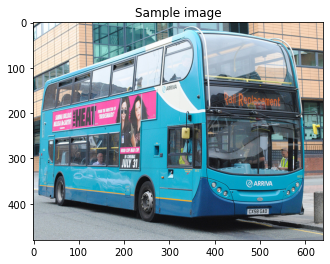

A double decker bus is parked on the street.


In [13]:
original_mage, image = next(iter(data_loader))

# result = model(data[1], [])

plt.imshow(np.squeeze(original_mage))
plt.title("Sample image")
plt.show()

print(result_to_text(model.sample(image), vocabulary))